<a href="https://colab.research.google.com/github/martinpius/keras_Functional_API_architecture/blob/main/keras_functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
try: 
  drive.mount("/content/drive", force_remount = True)
  COLAB = True
  import tensorflow as tf
  print(f"You are using colab with tensorflow version {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n...Load your drive please...")
def time_fmt(t):
  h = int(t/(60 * 60))
  m = int(t % (60 *60) / 60)
  s = int(t % 60)
  return f"{h}:{m:>03}:{s:>05.2f}"

Mounted at /content/drive
You are using colab with tensorflow version 2.3.0


In [2]:
#Keras model can be constructed in multiple ways depending on the number of inputs/outputs or degree of customization the user desires
#to have. In this notbook we will focus on keras functional API

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Input, BatchNormalization, Dropout,MaxPooling2D, Conv2D
import numpy as np
import time


In [4]:
#Keras models by using functional API provides more freedom and flexibility to the model builder to customize accordingly especially
#when we have shared layers or multiple inputs/outputs.

In [5]:
#Simple expample of multilayers perceptron using keras function API
inputs = Input(shape = (560), name = 'input_shape')
x = Dense(units = 64, kernel_initializer = 'random_normal', activation = 'relu',name = 'layer_1')(inputs)
x = Dense(units = 32, kernel_initializer = 'random_normal', activation = 'relu', name = 'layer_2')(x)
x = Dropout(rate = 0.2)(x)
outputs = Dense(units = 4, activation = 'softmax')(x)
model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 560)]             0         
_________________________________________________________________
layer_1 (Dense)              (None, 64)                35904     
_________________________________________________________________
layer_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 132       
Total params: 38,116
Trainable params: 38,116
Non-trainable params: 0
_________________________________________________________________


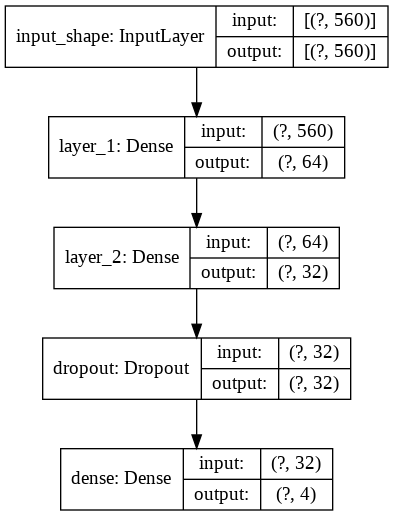

In [6]:
#We can vissualize the model
tf.keras.utils.plot_model(model, to_file = 'MLP.png',show_shapes = True)

In [7]:
# A simple MLP neural network using keras functional API with mnist data
inputs = Input(shape = (784), name = 'input_name')

In [8]:
x = Dense(units = 256, kernel_initializer = 'random_normal',activation = 'relu', name = 'layer_1')(inputs)
x = Dense(units = 128, kernel_initializer = 'random_normal', activation = 'relu', name = 'layer_2')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 64, kernel_initializer = 'random_normal',activation = 'relu', name = 'layer_3')(x)
outputs = Dense(units = 10,activation = 'softmax', name = 'output_layer')(x)
model = Model(inputs = inputs, outputs = outputs)



In [9]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_name (InputLayer)      [(None, 784)]             0         
_________________________________________________________________
layer_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
________________________________________________

In [10]:
x1 = tf.ones(shape = (2,784))

In [11]:
#Testing our model on single fake image data format x1
model(x1)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.08769606, 0.05859179, 0.09474136, 0.16323483, 0.10404268,
        0.07830931, 0.10793   , 0.13869436, 0.09333635, 0.07342327],
       [0.08769606, 0.05859179, 0.09474136, 0.16323483, 0.10404268,
        0.07830931, 0.10793   , 0.13869436, 0.09333635, 0.07342327]],
      dtype=float32)>

In [12]:
#using our simple cnn model created by keras functional API on MNIST dataset
#Loading the data
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
#Print out the shapes 
print(f"x_train_shape: {x_train.shape}, y_train_shape: {y_train.shape}\nx_test_shape :{x_test.shape}, y_test.shape: {y_test.shape}")

x_train_shape: (60000, 28, 28), y_train_shape: (60000,)
x_test_shape :(10000, 28, 28), y_test.shape: (10000,)


In [14]:
x_train, x_test = x_train.reshape(60000,784).astype('float32')/255, x_test.reshape(10000,784).astype('float32')/255


In [15]:
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [16]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = 'Adam', metrics = ['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=16, epochs = 10, verbose = 2, validation_split=0.2)

Epoch 1/10
3000/3000 - 6s - loss: 1.5882 - accuracy: 0.8767 - val_loss: 1.5329 - val_accuracy: 0.9274
Epoch 2/10
3000/3000 - 6s - loss: 1.5211 - accuracy: 0.9400 - val_loss: 1.5087 - val_accuracy: 0.9524
Epoch 3/10
3000/3000 - 6s - loss: 1.5118 - accuracy: 0.9493 - val_loss: 1.5097 - val_accuracy: 0.9509
Epoch 4/10
3000/3000 - 6s - loss: 1.5072 - accuracy: 0.9537 - val_loss: 1.5043 - val_accuracy: 0.9567
Epoch 5/10
3000/3000 - 6s - loss: 1.5064 - accuracy: 0.9545 - val_loss: 1.5163 - val_accuracy: 0.9447
Epoch 6/10
3000/3000 - 6s - loss: 1.5055 - accuracy: 0.9556 - val_loss: 1.5113 - val_accuracy: 0.9497
Epoch 7/10
3000/3000 - 7s - loss: 1.5069 - accuracy: 0.9541 - val_loss: 1.5120 - val_accuracy: 0.9488
Epoch 8/10
3000/3000 - 6s - loss: 1.5062 - accuracy: 0.9549 - val_loss: 1.5003 - val_accuracy: 0.9607
Epoch 9/10
3000/3000 - 6s - loss: 1.5026 - accuracy: 0.9584 - val_loss: 1.4990 - val_accuracy: 0.9620
Epoch 10/10
3000/3000 - 6s - loss: 1.5013 - accuracy: 0.9599 - val_loss: 1.4958 - 

In [18]:
eval = model.evaluate(x_test, y_test, verbose= 2)
print(f"loss = {eval[0]}\naccuracy = {eval[1]}")

313/313 - 1s - loss: 1.4971 - accuracy: 0.9639
loss = 1.4970791339874268
accuracy = 0.9639000296592712


In [19]:
#Multiple models on the same graph using keras functional API
#We can define more than one model on the same graph like the case of encoder's decoder's models
#We may want to scale down the image and decodes to obtain necessary features and finaly try to 
#reconstruct the image using the representative features (encoding).
#Consider the example below

In [20]:
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPooling2D, Conv2D,Reshape
from tensorflow.keras.layers import Conv2DTranspose, Input, UpSampling2D
from tensorflow.keras.models import Model


In [50]:
#Common input to the encoder and decoder
inputs = Input(shape = (248,248,3), name = 'input_shape') #original image

In [51]:
x = Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding = 'same', name = 'layer_1')(inputs)
x = Activation('relu')(x)
x = Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding = 'same', name = 'layer_2')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = 3)(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 16, kernel_size = (3,3), strides = (2,2), padding = 'same',activation = 'relu', name = 'layer_3')(x)
x = MaxPooling2D(pool_size = 3)(x)
encoder_out = GlobalMaxPooling2D()(x)

In [52]:
encoder = Model(inputs = inputs, outputs = encoder_out)

In [54]:
decoder_input = Input(shape = (16,), name = 'input')
x = Reshape((4,4,1))(decoder_input)
x = Conv2DTranspose(filters = 16, kernel_size = (3,3), strides = (1,1),padding = 'same')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid')(x)
x = Activation('relu')(x)
x = UpSampling2D(size = (3,3))(x)
x = Conv2DTranspose(filters = 32, kernel_size = (3,3), strides = (1,1),padding = 'valid', activation = 'relu')(x)
x = UpSampling2D(size = (6,6))(x)
x = Conv2DTranspose(filters = 1, kernel_size = (3,3), activation = 'relu')(x)
x = Conv2DTranspose(filters = 3, kernel_size = (3,3),activation = 'relu')(x) #Makesure you reconstruct the original image
decoder_out = UpSampling2D(size = (2,2))(x)

In [42]:
decoder = Model(inputs = decoder_input, outputs = decoder_out)

In [43]:
encoder.summary()

Model: "functional_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 248, 248, 3)]     0         
_________________________________________________________________
layer_1 (Conv2D)             (None, 124, 124, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 124, 124, 32)      0         
_________________________________________________________________
layer_2 (Conv2D)             (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 32)      

In [44]:
decoder.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 16)]              0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 4, 4, 16)          160       
_________________________________________________________________
activation_10 (Activation)   (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 6, 6, 32)          4640      
_________________________________________________________________
activation_11 (Activation)   (None, 6, 6, 32)          0         
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 18, 18, 32)      

In [28]:
#Finalization of the encoder-decoder model

In [45]:
myinput = Input(shape = (248,248,3), name = 'input')
myencoder = encoder(myinput)

In [46]:
mydecoder = decoder(myencoder)

In [48]:
encoder_decoder = Model(inputs = myinput, outputs = mydecoder) #Get the autoencoder model

In [49]:
encoder_decoder.summary()

Model: "functional_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 248, 248, 3)]     0         
_________________________________________________________________
functional_12 (Functional)   (None, 16)                14896     
_________________________________________________________________
functional_15 (Functional)   (None, 248, 248, 3)       14367     
Total params: 29,263
Trainable params: 29,199
Non-trainable params: 64
_________________________________________________________________


In [66]:
#Model with multiple outputs can also be created using functional API in keras
#Consider the following Multilayer perceptrons
def mlp_ensemble():
  inputs = Input(shape = (128,), name = 'input_shape')
  x = Dense(units = 32, kernel_initializer = 'random_normal', activation = 'relu', name = 'layer_1')(inputs)
  x = Dense(units = 16, kernel_initializer = 'random_normal', activation = 'relu', name = 'layer_2')(x)
  outputs = Dense(units = 10, activation = 'softmax', name = 'output_layer')(x)
  return Model(inputs = inputs, outputs = outputs)

In [67]:
m1 = mlp_ensemble()
m2 = mlp_ensemble()
m3 = mlp_ensemble()
m4 = mlp_ensemble()
m5 = mlp_ensemble()
inputs = Input(shape = (128,), name = 'inputs')
out_1 = m1(inputs)
out_2 = m2(inputs)
out_3 = m3(inputs)
out_4 = m4(inputs)
out_5 = m5(inputs)

ensemble_outputs = tf.keras.layers.average([out_1, out_2, out_3, out_4, out_5]) #Averaging all the outputs layer if they relate to the same thing

In [68]:
Ensemble_model = Model(inputs = inputs, outputs = ensemble_outputs, name = 'Ensemble_Model')

In [69]:
Ensemble_model.summary()

Model: "Ensemble_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 128)]        0                                            
__________________________________________________________________________________________________
functional_22 (Functional)      (None, 10)           4826        inputs[0][0]                     
__________________________________________________________________________________________________
functional_24 (Functional)      (None, 10)           4826        inputs[0][0]                     
__________________________________________________________________________________________________
functional_26 (Functional)      (None, 10)           4826        inputs[0][0]                     
_____________________________________________________________________________________